In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV file
file_path = 'main.csv'
original_df = pd.read_csv(file_path)

# Displaying the first few rows
original_df.head()

,booking_reference,booked_at,route_id,status,departure_date,departure_time,passengers,cancellation_reason,decline_reason,payment_type,...,operator_name,total_price,paid_cost,distinct_route,line_id,is_refundable,is_supplier_api,online_cancel_timestamp,approved_timestamp,decline_timestamp
0,BW790156,2023-01-31,halong-bay-to-ninh-binh,canceled,2023-02-04,12:30:00,2,"online cancel - Booking error (wrong date, dep...",NaN,credit card,...,The Long Travel,21.72,0.00,halong-bay-to-ninh-binh,5a69df6daaa0ed0008a83563,True,False,2023-01-31 02:11:05.282000 UTC,NaN,NaN
1,BW789943,2023-01-31,sapa-to-ninh-binh,canceled,2023-02-01,16:30:00,1,online cancel - I found a cheaper trip elsewhere,NaN,digital wallet,...,The Long Travel,19.48,0.00,ninh-binh-to-sapa,5d89c2e4bf7f4c154e85b0a5,True,False,2023-01-31 07:35:03.505000 UTC,2023-01-31 00:39:41.864000 UTC,NaN
2,BW792261,2023-01-31,ninh-binh-to-hoi-an,canceled,2023-02-21,20:30:00,4,online cancel - My plans changed,NaN,credit card,...,Queen Cafe Bus,83.70,6.83,hoi-an-to-ninh-binh,5a981b0700f88e0001ac1ef7,True,False,2023-02-05 15:54:38.728000 UTC,2023-02-01 01:34:15.387000 UTC,NaN
3,BW791692,2023-01-31,halong-bay-to-ninh-binh,canceled,2023-02-01,12:00:00,1,online cancel - I found a cheaper trip elsewhere,NaN,credit card,...,Rosa Eco Bus,19.79,0.00,halong-bay-to-ninh-binh,637e01096354d064e69bbadc,True,False,2023-02-01 00:40:15.770000 UTC,NaN,NaN
4,BW792045,2023-01-31,koh-phangan-to-koh-samui,canceled,2023-02-03,16:00:00,2,"online cancel - Booking error (wrong date, dep...",NaN,credit card,...,Seatran Discovery,22.74,0.12,koh-phangan-to-koh-samui,5ae62e7a4120a90001e5cabe,True,False,2023-02-02 07:14:17.329000 UTC,2023-01-31 16:05:27.044000 UTC,NaN


# summer

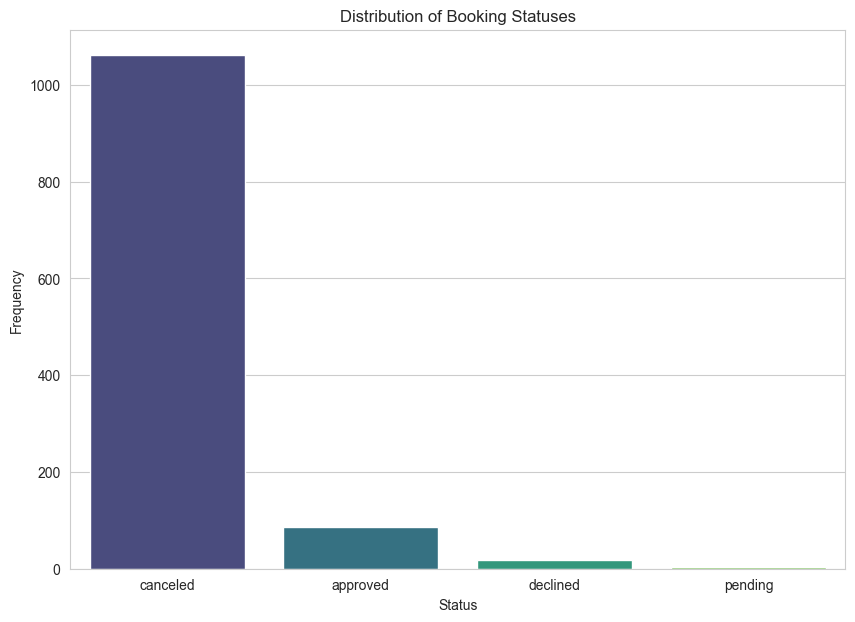

,Status,Percentage
0,canceled,90.916881
1,approved,7.369323
2,declined,1.456727
3,pending,0.257069


In [45]:
summer_df = original_df[original_df['booked_at'].str.contains('2023-06|2023-07|2023-08')]
status_distribution = summer_df['status'].value_counts()

# Plotting the distribution of booking statuses
plt.figure(figsize=(10, 7))
sns.barplot(x=status_distribution.index, y=status_distribution.values, palette="viridis")
plt.title('Distribution of Booking Statuses')
plt.xlabel('Status')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.show()

# Counting the frequency of each booking status
booking_status_distribution = summer_df['status'].value_counts(normalize=True) * 100

# Displaying the distribution as percentages
booking_status_distribution.rename_axis('Status').reset_index(name='Percentage')

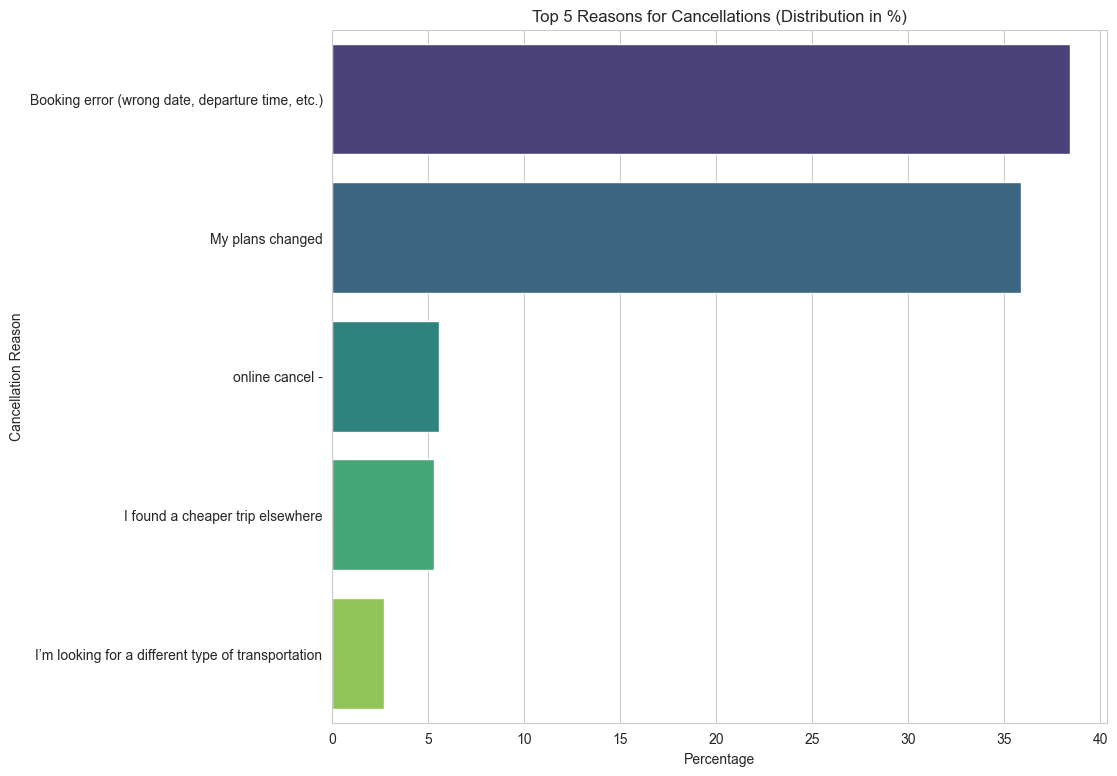

cancellation_reason
online cancel - Booking error (wrong date, departure time, etc.)      326
online cancel - My plans changed                                      304
online cancel -                                                        47
online cancel - I found a cheaper trip elsewhere                       45
online cancel - I’m looking for a different type of transportation     23
Name: count, dtype: int64

In [44]:
# summer_df = original_df[original_df['booked_at'].str.contains('2023-06|2023-07|2023-08')]
# Considering all rows (regardless of status) for analyzing cancellation reasons
# Filtering non-null cancellation reasons
cancellation_reason = summer_df[summer_df['cancellation_reason'].notna()]['cancellation_reason']

top_cancellation_reasons_abs = cancellation_reason.value_counts().nlargest(5)
cancellation_reasons_distribution = cancellation_reason.value_counts(normalize=True) * 100

top_cancellation_reasons = cancellation_reasons_distribution.head(5)
stripped_labels = [label.replace("online cancel - ", "") for label in top_cancellation_reasons.index]
# Plotting the top 5 cancellation reasons as a horizontal bar chart with distribution (percentages)
plt.figure(figsize=(10, 9))
sns.barplot(y=top_cancellation_reasons.index, x=top_cancellation_reasons.values, palette='viridis')
plt.title('Top 5 Reasons for Cancellations (Distribution in %)')
plt.xlabel('Percentage')
plt.yticks(range(len(stripped_labels)), stripped_labels)
plt.ylabel('Cancellation Reason')
plt.show()

# Printing the top 5 cancellation reasons with absolute values
top_cancellation_reasons_abs

In [42]:
original_df.columns

# paid_cost

Index(['booking_reference', 'booked_at', 'route_id', 'status',
       'departure_date', 'departure_time', 'passengers', 'cancellation_reason',
       'decline_reason', 'payment_type', 'operator_id', 'operator_name',
       'total_price', 'paid_cost', 'distinct_route', 'line_id',
       'is_refundable', 'is_supplier_api', 'online_cancel_timestamp',
       'approved_timestamp', 'decline_timestamp', 'is_canceled',
       'is_declined'],
      dtype='object')

In [41]:
# find minimum and maximum values of the column booked_at
print(original_df['booked_at'].min())
print(original_df['booked_at'].max())

2023-01-02
2023-08-06


In [76]:

print(len(original_df.index))
# length of cancellation_reason not null
print(len(original_df[original_df['cancellation_reason'].notnull()].index))
# length of cancellation_reason null
print(len(original_df[original_df['decline_reason'].notnull()].index))
# length of status equals to approved and has not cancellation_reason or decline_reason
print(len(original_df[(original_df['status'] == 'approved') & (original_df['cancellation_reason'].isnull()) & (original_df['decline_reason'].isnull())].index))

# check if any rows dont have cancellation_reason nor decline_reason 
print(len(original_df[(original_df['cancellation_reason'].isnull()) & (original_df['decline_reason'].isnull())].index))
print(len(original_df[(original_df['cancellation_reason'].isnull()) | (original_df['decline_reason'].isnull())].index))
df_no_reason = original_df[(original_df['cancellation_reason'].isnull()) | (original_df['decline_reason'].isnull())]
df_no_reason
# where both are not null
print(len(original_df[(original_df['cancellation_reason'].notnull()) & (original_df['decline_reason'].notnull())].index))

5000
3557
1531
0
0
4912
88


In [80]:
df_non_null_reason = original_df[(original_df['cancellation_reason'].notnull()) & (original_df['decline_reason'].notnull())]
df_non_null_reason
# check if decline_timestamp is < online_cancel_timestamp in non null reason
print(len(df_non_null_reason[df_non_null_reason['decline_timestamp'] < df_non_null_reason['online_cancel_timestamp']].index))
print(len(df_non_null_reason.index))
df_non_null_reason['cancellation_reason'].value_counts()

87
88


is_refundable
True     72
False    16
Name: count, dtype: int64

In [66]:
# count status = approved
print(len(original_df[original_df['status'] == 'approved'].index))
df_approved = original_df[original_df['status'] == 'approved']
df_approved
# count how many in approved have cancellation_reason
print(len(original_df[(original_df['status'] == 'approved') & (original_df['cancellation_reason'].notnull())].index))
# count how many in approved have decline_reason
print(len(original_df[(original_df['status'] == 'approved') & (original_df['decline_reason'].notnull())].index))


468
132
336


Let's begin by exploring the overall distribution of cancellations and declines in the dataset. We'll analyze the frequency of each status, the common reasons for cancellations and declines, and any patterns or trends that might emerge.

### Step 1: Distribution of Booking Status
First, we'll look at the distribution of the booking status to understand the proportion of cancellations and declines relative to other statuses.

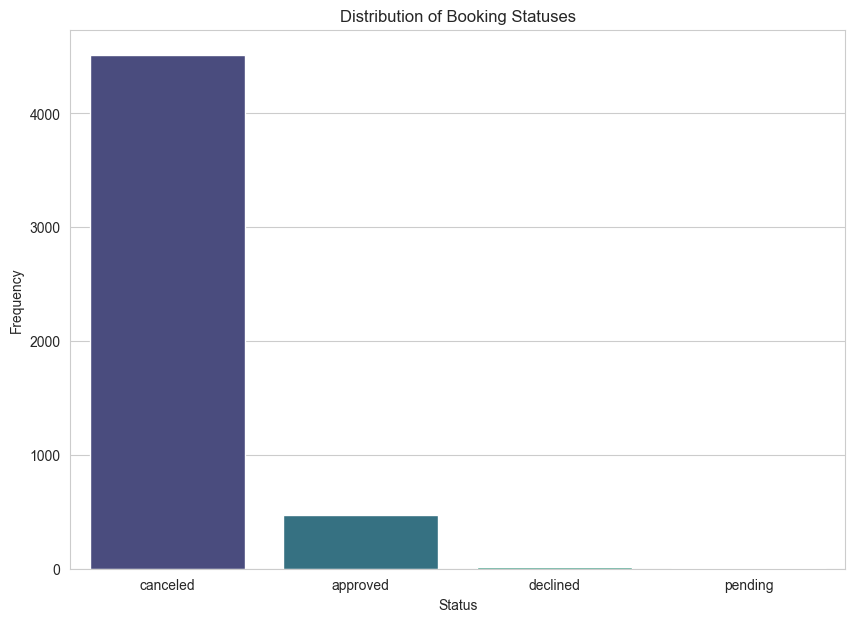

,Status,Percentage
0,canceled,90.18
1,approved,9.36
2,declined,0.38
3,pending,0.08


In [36]:
# Setting plot style
sns.set_style("whitegrid")

# Distribution of booking statuses
status_distribution = original_df['status'].value_counts()

# Plotting the distribution of booking statuses
plt.figure(figsize=(10, 7))
sns.barplot(x=status_distribution.index, y=status_distribution.values, palette="viridis")
plt.title('Distribution of Booking Statuses')
plt.xlabel('Status')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.show()

# Counting the frequency of each booking status
booking_status_distribution = original_df['status'].value_counts(normalize=True) * 100

# Displaying the distribution as percentages
booking_status_distribution.rename_axis('Status').reset_index(name='Percentage')

The distribution of booking statuses reveals the following insights:

* Cancellations: Approximately 90.18% of the bookings are marked as "canceled." 
* Approvals: Around 9.36% of the bookings are "approved."
* Declines: Only 0.38% of the bookings are "declined."
* Pending: A very small portion (0.08%) of the bookings are "pending."

It's evident that a significant number of bookings have been canceled, followed by approved bookings, while there are a few declined and pending statuses.

### 2. Common Reasons for Cancellations and Declines:

Next, let's delve into the common reasons for cancellations and declines. We'll start by visualizing the top reasons for cancellations.

#### Top Reasons for Cancellations:

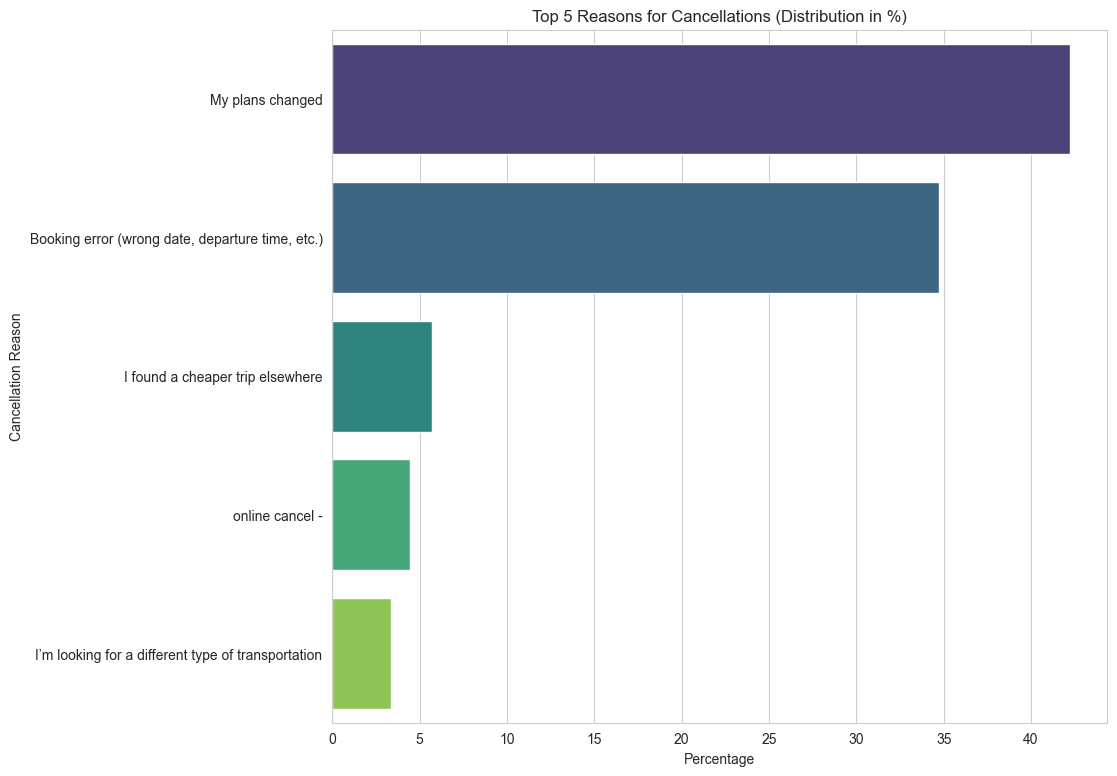

cancellation_reason
online cancel - My plans changed                                      1503
online cancel - Booking error (wrong date, departure time, etc.)      1236
online cancel - I found a cheaper trip elsewhere                       203
online cancel -                                                        159
online cancel - I’m looking for a different type of transportation     119
Name: count, dtype: int64

In [37]:
# Considering all rows (regardless of status) for analyzing cancellation reasons
# Filtering non-null cancellation reasons
cancellation_reason = original_df[original_df['cancellation_reason'].notna()]['cancellation_reason']

top_cancellation_reasons_abs = cancellation_reason.value_counts().nlargest(5)
cancellation_reasons_distribution = cancellation_reason.value_counts(normalize=True) * 100

top_cancellation_reasons = cancellation_reasons_distribution.head(5)
stripped_labels = [label.replace("online cancel - ", "") for label in top_cancellation_reasons.index]
# Plotting the top 5 cancellation reasons as a horizontal bar chart with distribution (percentages)
plt.figure(figsize=(10, 9))
sns.barplot(y=top_cancellation_reasons.index, x=top_cancellation_reasons.values, palette='viridis')
plt.title('Top 5 Reasons for Cancellations (Distribution in %)')
plt.xlabel('Percentage')
plt.yticks(range(len(stripped_labels)), stripped_labels)
plt.ylabel('Cancellation Reason')
plt.show()

# Printing the top 5 cancellation reasons with absolute values
top_cancellation_reasons_abs

The top 5 cancellation reasons, presented as a percentage of total cancellations, are:

1. My Plans Changed: 42.254709%
2. Booking Error (wrong date, departure, etc.): 34.748383%
3. Found a Cheaper Trip Elsewhere: 5.7%
4. Online Cancel (unspecified reason): 4.5%
5. Looking for a Different Type of Trip: 3.35%
These insights provide a clear understanding of why customers are canceling their bookings.


    

### Top Reasons for Declines:

Next, let's analyze the reasons for booking declines in a similar manner. 
We'll count the frequency of each decline reason, and visualize the distribution as percentages.

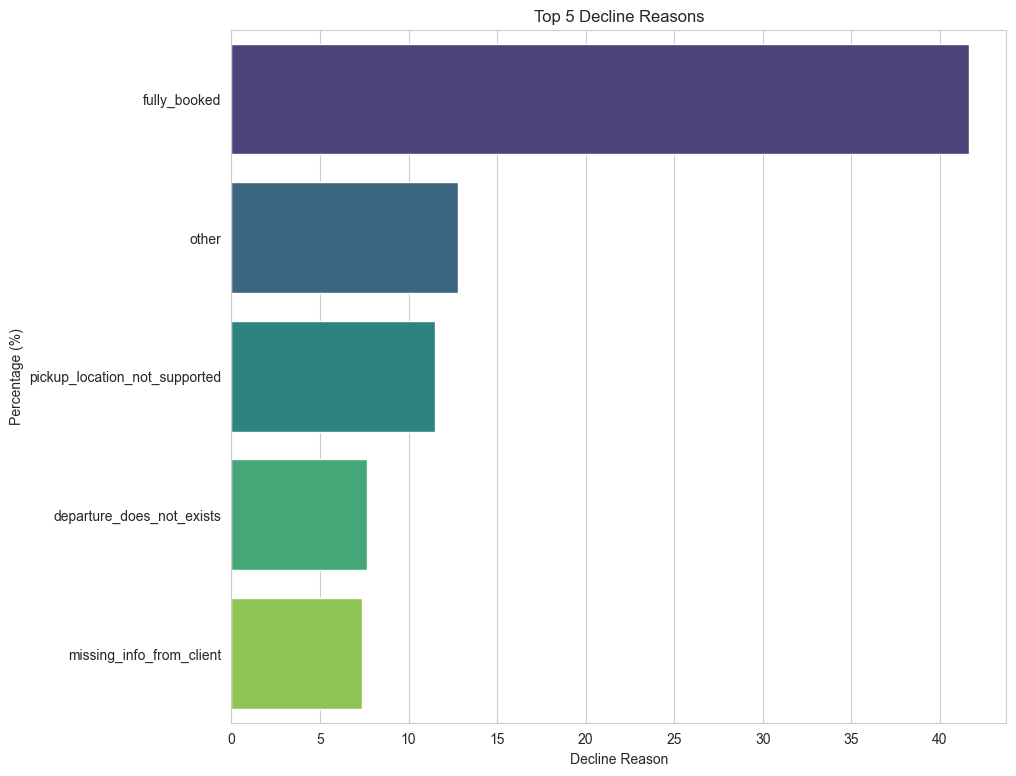

decline_reason
fully_booked                     41.672110
other                            12.802090
pickup_location_not_supported    11.495754
departure_does_not_exists         7.642064
missing_info_from_client          7.380797
Name: proportion, dtype: float64

In [38]:
# Filtering non-null decline reasons
decline_reasons = original_df[original_df['decline_reason'].notna()]['decline_reason']

# Calculating the distribution of the top 5 decline reasons
top_5_decline_reasons_distribution = decline_reasons.value_counts(normalize=True).head(5) * 100

# Plotting a vertical bar chart for the top 5 decline reasons
plt.figure(figsize=[10, 9])
# top_5_decline_reasons_distribution.plot(kind='bar', color='skyblue')
sns.barplot(y=top_5_decline_reasons_distribution.index, x=top_5_decline_reasons_distribution.values, palette='viridis')
plt.title('Top 5 Decline Reasons')
plt.ylabel('Percentage (%)')
plt.xlabel('Decline Reason')
# plt.xticks(rotation=45, ha="right")
plt.show()
top_5_decline_reasons_distribution.head()

## Analysis of cancellation trends by operators:


Exploring correlations between cancellation reasons and other variables such as routes, operators, and prices. This can help in identifying underlying factors that might be influencing cancellations.

# version 2

In [5]:
data = original_df
# calculate total bookings for each operator
total_bookings = data.groupby('operator_name')['booking_reference'].count().reset_index()
total_bookings.sort_values(by='booking_reference', ascending=False, inplace=True)
# count cancellations for each operator by dividing the number of cancellations by the total bookings and checking number of cancellations by is_cancelled null

Futa Bus: Cancellation Rate = 42.11%, Decline Rate = 60.53%, Total Bookings = 76.0
RideCR: Cancellation Rate = 27.16%, Decline Rate = 76.54%, Total Bookings = 81.0
Nica Expreso: Cancellation Rate = 78.57%, Decline Rate = 21.43%, Total Bookings = 84.0
Phantip Travel: Cancellation Rate = 50.00%, Decline Rate = 50.00%, Total Bookings = 88.0
Ultramar: Cancellation Rate = 100.00%, Decline Rate = 0.00%, Total Bookings = 97.0
Interbus: Cancellation Rate = 36.73%, Decline Rate = 66.33%, Total Bookings = 98.0
Easy Ride: Cancellation Rate = 29.13%, Decline Rate = 76.70%, Total Bookings = 103.0
CTM Bus: Cancellation Rate = 57.74%, Decline Rate = 42.26%, Total Bookings = 168.0
OceanJet: Cancellation Rate = 84.79%, Decline Rate = 15.67%, Total Bookings = 217.0
Krilo (Kapetan Luka): Cancellation Rate = 100.00%, Decline Rate = 0.00%, Total Bookings = 403.0


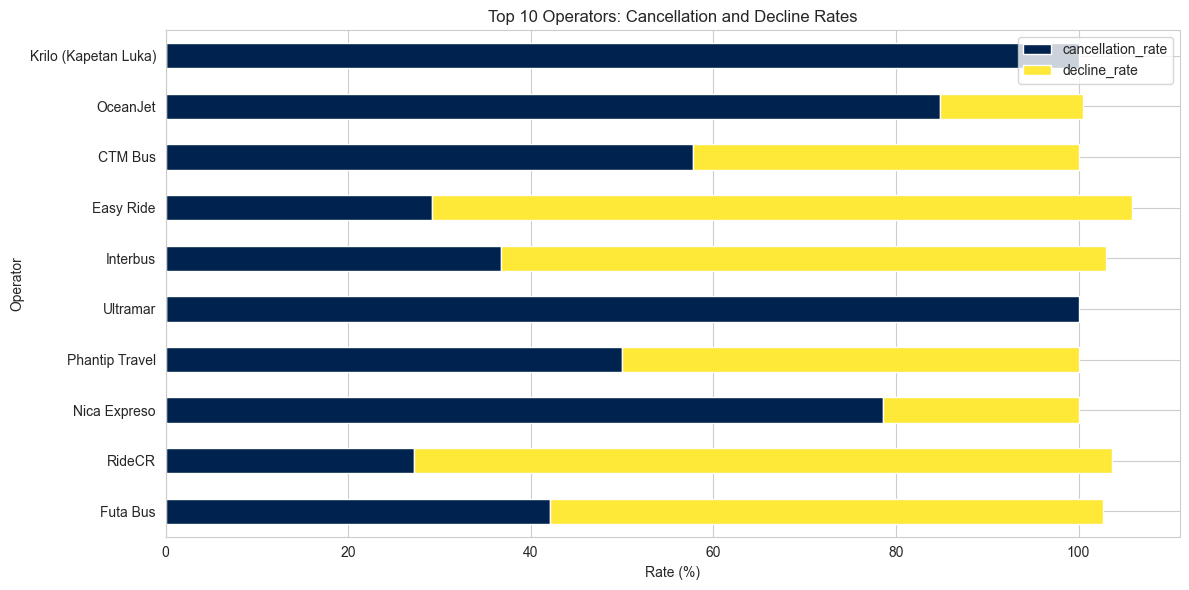

In [6]:
# Creating flags for cancellation and decline
original_df['is_canceled'] = original_df['cancellation_reason'].notnull()
original_df['is_declined'] = original_df['decline_reason'].notnull()

# Grouping by operator and calculating the cancellation and decline rates
top_10_operators = original_df['operator_name'].value_counts().nlargest(10).index
top_10_data = original_df[original_df['operator_name'].isin(top_10_operators)]
operator_analysis = top_10_data.groupby('operator_name').agg(
    total_bookings=pd.NamedAgg(column='booking_reference', aggfunc='count'),
    cancellations=pd.NamedAgg(column='is_canceled', aggfunc='sum'),
    declines=pd.NamedAgg(column='is_declined', aggfunc='sum')
)
operator_analysis['cancellation_rate'] = (operator_analysis['cancellations'] / operator_analysis['total_bookings']) * 100
operator_analysis['decline_rate'] = (operator_analysis['declines'] / operator_analysis['total_bookings']) * 100

# sorting by total bookings
operator_analysis.sort_values(by='total_bookings', ascending=True, inplace=True)

# Printing cancellation and decline rates for each operator
for operator, row in operator_analysis.iterrows():
    print(f"{operator}: Cancellation Rate = {row['cancellation_rate']:.2f}%, Decline Rate = {row['decline_rate']:.2f}%, Total Bookings = {row['total_bookings']}")

# Selecting only the cancellation and decline rates for plotting
top_10_operators_rates = operator_analysis[['cancellation_rate', 'decline_rate']]

# Plotting
# top_10_operators_rates.plot(kind='barh', stacked=True, colormap='viridis', figsize=(12, 6))
top_10_operators_rates.plot(kind='barh', stacked=True, colormap='cividis', figsize=(12, 6))
# top_10_operators_rates.plot(kind='barh', stacked=True, colormap='cividis', width=0.8)
plt.title('Top 10 Operators: Cancellation and Decline Rates')
plt.xlabel('Rate (%)')
plt.ylabel('Operator')
plt.tight_layout()
# plt.legend(['Cancellation Rate', 'Decline Rate'])
plt.show()

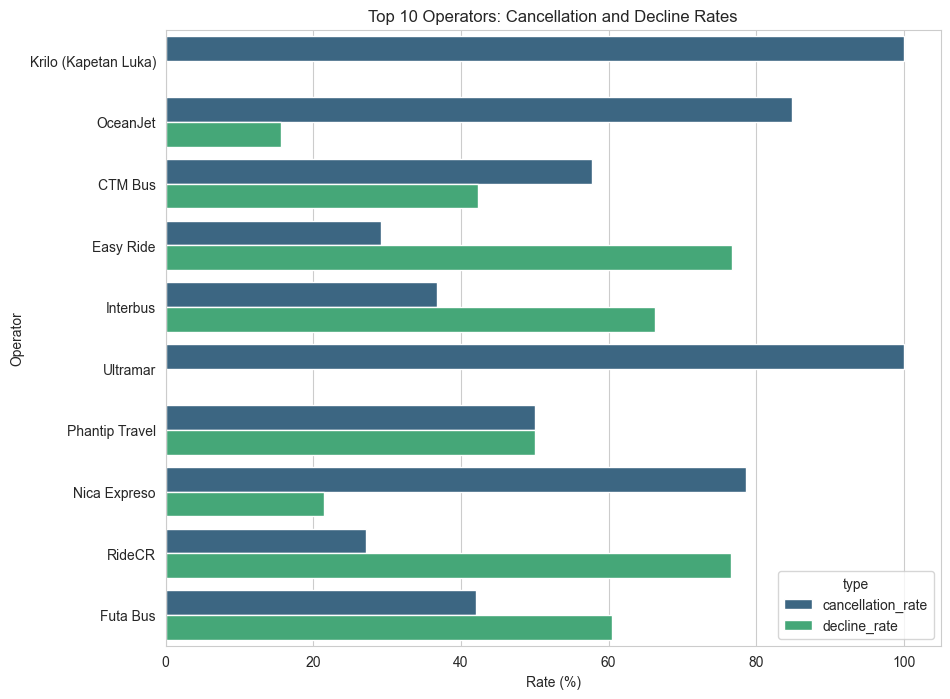

Krilo (Kapetan Luka): Cancellation Rate = 100.00%, Decline Rate = 0.00%
OceanJet: Cancellation Rate = 84.79%, Decline Rate = 15.67%
CTM Bus: Cancellation Rate = 57.74%, Decline Rate = 42.26%
Easy Ride: Cancellation Rate = 29.13%, Decline Rate = 76.70%
Interbus: Cancellation Rate = 36.73%, Decline Rate = 66.33%
Ultramar: Cancellation Rate = 100.00%, Decline Rate = 0.00%
Phantip Travel: Cancellation Rate = 50.00%, Decline Rate = 50.00%
Nica Expreso: Cancellation Rate = 78.57%, Decline Rate = 21.43%
RideCR: Cancellation Rate = 27.16%, Decline Rate = 76.54%
Futa Bus: Cancellation Rate = 42.11%, Decline Rate = 60.53%


In [40]:
operator_analysis.sort_values(by='total_bookings', ascending=False, inplace=True)

stacked_data = operator_analysis[['cancellation_rate', 'decline_rate']].reset_index()
stacked_data = pd.melt(stacked_data, id_vars='operator_name', var_name='type', value_name='rate')

# Plotting the cancellation rates
plt.figure(figsize=(10, 8))
sns.barplot(x='rate', y='operator_name', hue='type', data=stacked_data, palette='viridis',)

# Labels and Title
plt.xlabel('Rate (%)')
plt.ylabel('Operator')
plt.title('Top 10 Operators: Cancellation and Decline Rates')
plt.show()

# Printing detailed statistics
for operator, row in operator_analysis.iterrows():
    print(f"{operator}: Cancellation Rate = {row['cancellation_rate']:.2f}%, Decline Rate = {row['decline_rate']:.2f}%")

